In [99]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load GPT-2 tokenizer and model
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prediction function
def predict_sentiment_gpt2(text, max_length=50):
    prompt = f"Tweet: {text}\nSentiment:"
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate prediction from GPT-2
    output_ids = model.generate(
        input_ids,
        max_length=max_length,
        pad_token_id=tokenizer.eos_token_id,
        num_return_sequences=1,
        do_sample=False  # Greedy decoding
    )

    # Decode and extract sentiment
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    sentiment_part = output_text[len(prompt):].strip()
    sentiment_guess = sentiment_part.split("\n")[0].split()[0]  # Get first word

    return sentiment_guess

# Main loop
while True:
    text = input("Enter a tweet (type 'exit' to quit): ")
    if text.lower() == "exit":
        print("Exiting...")
        break

    sentiment = predict_sentiment_gpt2(text)
    print(f"Predicted Sentiment: {sentiment}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Enter a tweet (type 'exit' to quit): exit
Exiting...


In [100]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [101]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [102]:
model_name = "openai-community/gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [103]:
input_text = "i am Really impressed"
max_length = 128

input_ids = tokenizer(input_text, return_tensors="pt")

In [104]:
input_ids

{'input_ids': tensor([[   72,   716, 16123, 12617]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [105]:
input_ids = input_ids['input_ids'].to(device)

In [107]:
output = model.generate(input_ids, max_length=max_length, num_beams=5, do_sample=False)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [108]:
output

tensor([[   72,   716, 16123, 12617,   351,   428,  1720,    13,   314,   423,
           587,  1262,   340,   329,   625,   257,   614,   783,   290,   314,
           716,   845,  3772,   351,   340,    13,   314,   423,   587,  1262,
           340,   329,   625,   257,   614,   783,   290,   314,   716,   845,
          3772,   351,   340,    13,   314,   423,   587,  1262,   340,   329,
           625,   257,   614,   783,   290,   314,   716,   845,  3772,   351,
           340,    13,   314,   423,   587,  1262,   340,   329,   625,   257,
           614,   783,   290,   314,   716,   845,  3772,   351,   340,    13,
           314,   423,   587,  1262,   340,   329,   625,   257,   614,   783,
           290,   314,   716,   845,  3772,   351,   340,    13,   314,   423,
           587,  1262,   340,   329,   625,   257,   614,   783,   290,   314,
           716,   845,  3772,   351,   340,    13,   314,   423,   587,  1262,
           340,   329,   625,   257,   614,   783,  

In [109]:
print(tokenizer.decode(output[0]))

i am Really impressed with this product. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I am very happy with it. I have been using it for over a year now and I


In [110]:
output = model.generate(input_ids, max_length=max_length, num_beams=5, do_sample=False, no_repeat_ngram_size=2)
print(tokenizer.decode(output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


i am Really impressed with this product. I have been using it for over a year now and have never had any problems with it. The only thing I would say is that if you are looking for a high quality product, this is the one for you.

Rated 5 out of 5 by Anonymous from Great product! I bought this for my daughter and she loves it! It is a great product for the price. She is very happy with the quality of the product and I am sure she will love it as well.<|endoftext|>


In [111]:
output = model.generate(input_ids, max_length=max_length,do_sample=True,top_p=1)
tokenizer.decode(output[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"i am Really impressed by this game. The controls are fluidly executed and the game is fast and frantic as ever. It's just very annoying how long it takes to have to make a decision right away.Overall, I will give this the best review for those that like the game but would prefer to buy the full version.<|endoftext|>"

In [ ]:
import numpy as np
import pandas as pd

import nltk
import re

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
#nltk.download('stopwords'): Downloads NLTK stopwords, which are commonly used words (e.g., "the," "is," "and")
#that are often removed from text data during text processing for tasks like sentiment analysis or classification.
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re # Regular expressions are useful for pattern matching and text manipulation.

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.18.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv.zip',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
# convert numerical labels into human-readable categorical labels, making the data more understandable
def label_decoder(label):
    return lab_to_sentiment[label]
df['sentiment'] = df['sentiment'].map(label_decoder)
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

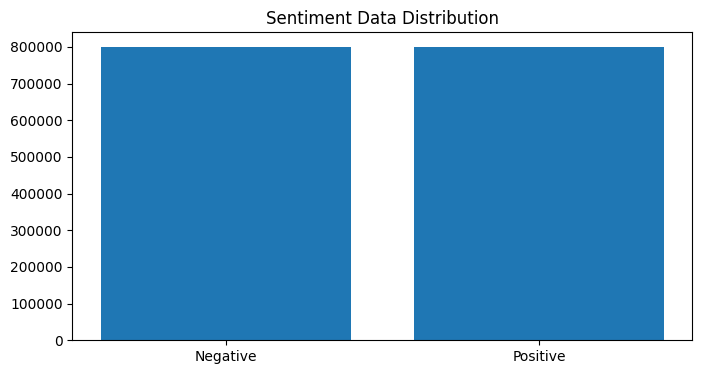

In [ ]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
df.sample(n=10)  # Randomly select 10 rows from the DataFrame

,sentiment,text
163459,Negative,&quot;sometime around midnight&quot; by The Ai...
1210544,Positive,Finally had a good night's rest in my apartmen...
1004419,Positive,sometimes people are strange
1166005,Positive,revision so boring :/ cant wait till this time...
1190120,Positive,chemistry. immadie. At least I have my Wednesd...
1133415,Positive,@tommcfly Kisses from chile!!! And STOP IGNOR...
1311986,Positive,@kailaengland I am seriously considering it......
974190,Positive,@jonoh Thanks for letting me know. I just wish...
476244,Negative,I'm REALLY sick.
874987,Positive,Given up with tile's dns the day. Heading out ...


In [ ]:
stop_words = stopwords.words('english') # (e.g., "the," "is," "and") that are often removed from text data
stemmer = SnowballStemmer('english') #"running" and "ran" would be stemmed to "run".

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"  # URL and username

In [ ]:
def preprocess(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    #Any pattern matched by text_cleaning_re will be replaced with a single space ' '
    #.strip() removes leading and trailing whitespace characters (spaces, tabs, etc.) from the modified text.
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)  #Joins the filtered tokens back together using " "

In [ ]:
df['text'] = df['text'].map(preprocess)

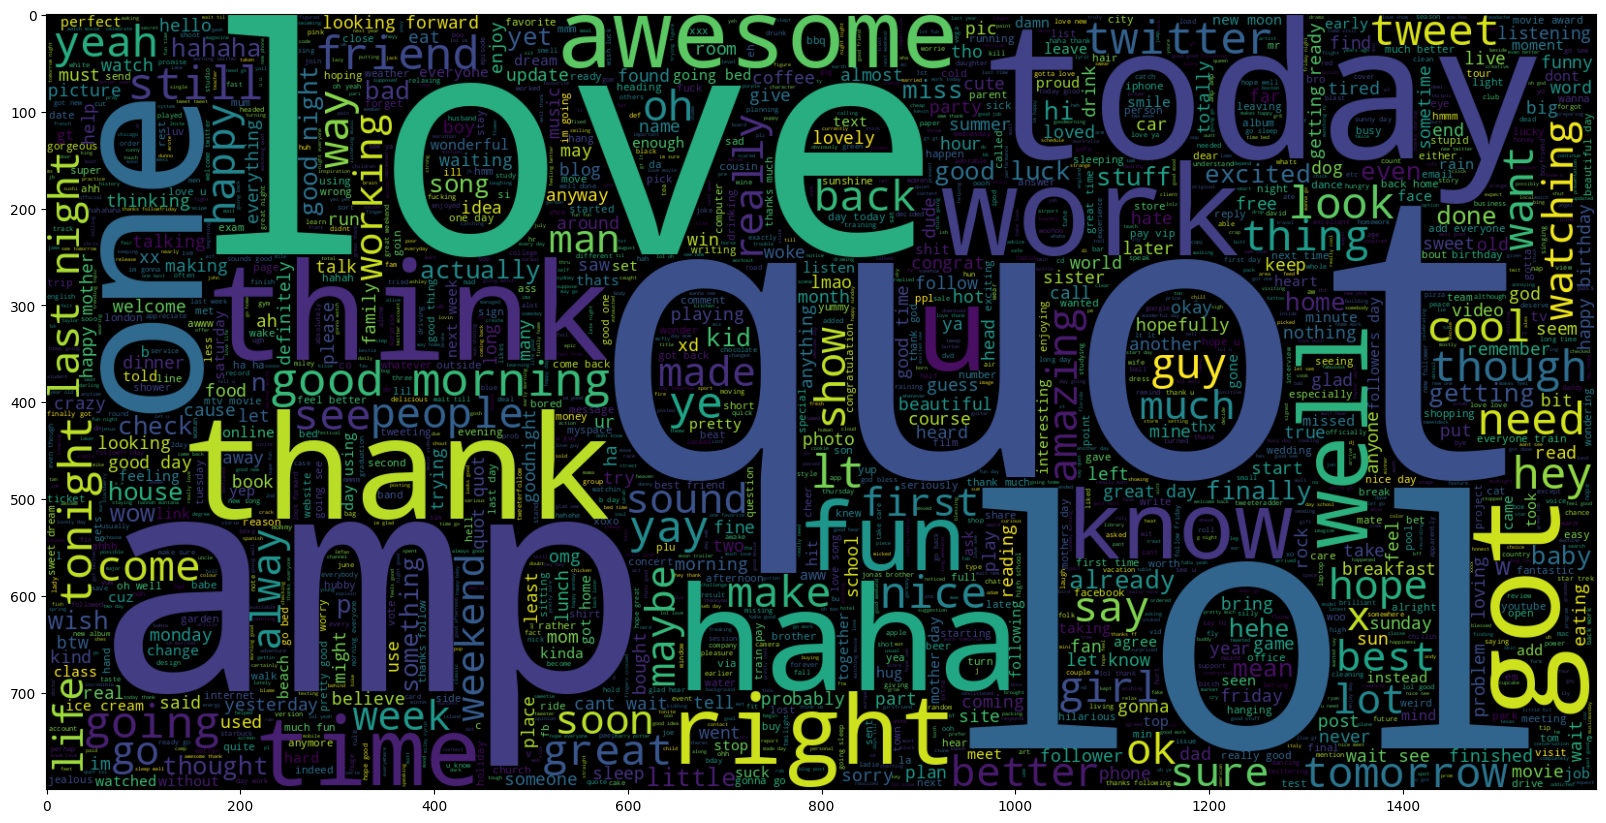

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

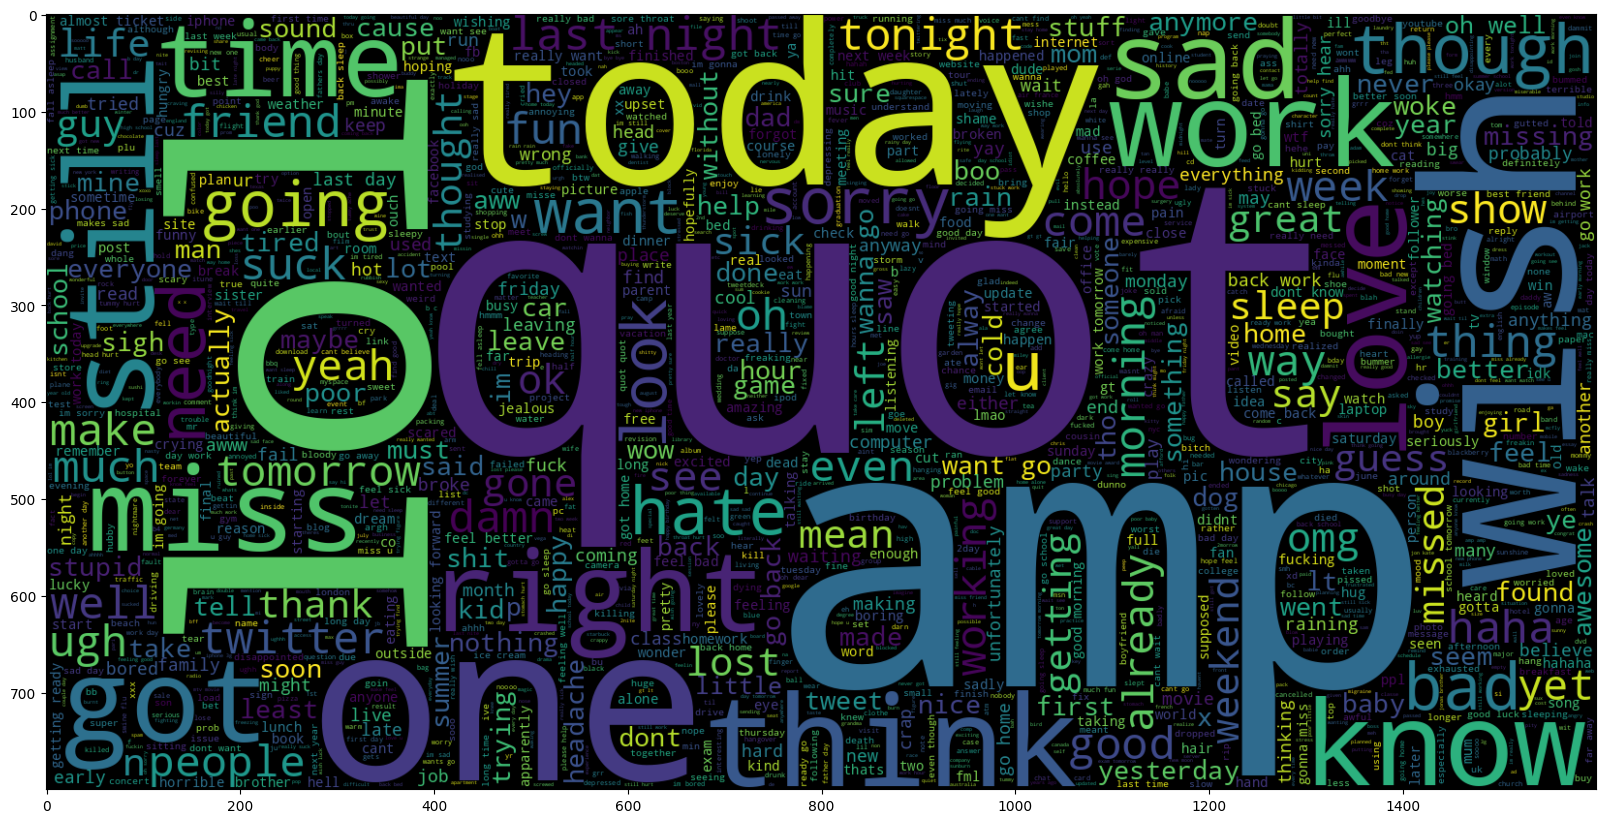

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
                                                         #Simplification for Initial Analysis
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text) #It assigns a unique integer index to each unique word in the text.

word_index = tokenizer.word_index #retrieves the word index dictionary
vocab_size = len(tokenizer.word_index) + 1 # returns the total number of unique words in the vocabulary.
#adds 1 for placeholder
print("Vocabulary Size :", vocab_size)


Vocabulary Size : 290575


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#convert sequences of texts into sequences of integers and then pads or truncates them to a fixed length

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
# converts the text sequences in the 'text' column of train_data into sequences
# of integers based on the word index generated by the Tokenizer.
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()
# this line of code will create a list like ['Positive', 'Negative']
# Preparing for Classification Tasks

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [ ]:
#download pretrained GloVe word embedded
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-23 18:53:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-23 18:53:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-23 18:53:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
GLOVE_EMB = r"/kaggle/working/glove.6B.300d.txt"
EMBEDDING_DIM = 300
LR = 1e-3 #learning rate
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [ ]:
GLOVE_MB = 'kaggle/input/glove6b300d/glove.6B.300d.txt'

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, Activation, Dropout, MaxPooling1D, Concatenate, Dense, GlobalMaxPooling1D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Define the model architecture
def build_model(hp):
    inputs = Input(shape=(MAX_SEQUENCE_LENGTH,))

    # Embedding layer
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=256, step=32)
    embedded = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM)(inputs)

    # First convolutional path
    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Int('conv1_kernel_size', min_value=2, max_value=5),
                   padding='valid')(embedded)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Dropout(hp.Float('conv1_dropout', min_value=0.2, max_value=0.7, step=0.1))(conv1)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    # Second convolutional path
    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Int('conv2_kernel_size', min_value=2, max_value=5),
                   padding='valid')(embedded)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Dropout(hp.Float('conv2_dropout', min_value=0.2, max_value=0.7, step=0.1))(conv2)
    conv2 = MaxPooling1D(pool_size=2)(conv2)

    # Concatenate convolutional outputs
    concatenated = Concatenate()([conv1, conv2])

    # Fully connected layer
    fc_units = hp.Int('fc_units', min_value=32, max_value=256, step=32)
    fc = Dense(units=fc_units)(concatenated)
    fc = GlobalMaxPooling1D()(fc)

    # Softmax layer
    num_classes = 1  # Binary classification
    output = Dense(units=num_classes, activation='sigmoid')(fc)

    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='my_project'
)
# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

Reloading Tuner from my_dir/my_project/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
192               |160               |embedding_dim
96                |128               |conv1_filters
4                 |2                 |conv1_kernel_size
0.3               |0.4               |conv1_dropout
128               |32                |conv2_filters
5                 |5                 |conv2_kernel_size
0.3               |0.6               |conv2_dropout
192               |96                |fc_units
0.0014111         |0.00023361        |learning_rate

Epoch 1/5
  724/32000 ━━━━━━━━━━━━━━━━━━━━ 11:37:55 1s/step - accuracy: 0.6232 - loss: 0.6635

In [ ]:
# Train the model with the entire training set
history=best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

NameError: name 'best_model' is not defined

NameError: name 'history' is not defined

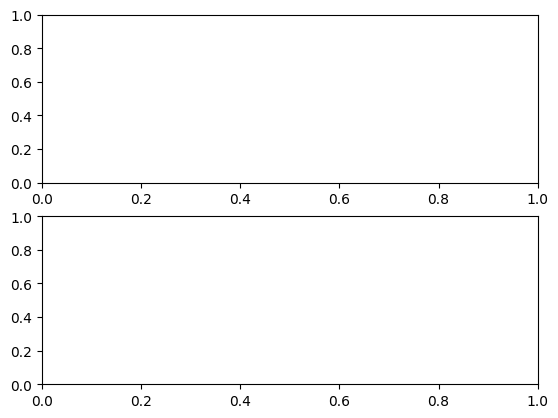

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['Train', 'Val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = best_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

NameError: name 'best_model' is not defined

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

NameError: name 'y_pred_1d' is not defined